In [1]:
# This code plots a smoothed spectra and it marks ha and hb lines. 
# for the code which returns ha and hb flux, see 0.1-smooth-spectra-median-filter-returns-flux

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os 
from astropy import units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import SplineInterpolatedResampler
import scipy.signal
import lineid_plot
from PyAstronomy import pyasl

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
path = os.listdir('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less')
path1 = '/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less'

In [3]:
for base_folder in path:
    sub_path = os.PathLike(os.path.join(path, base_folder))
    for file_name in sub_path:
        print(file_name)

TypeError: expected str, bytes or os.PathLike object, not list

In [7]:
f = []
for root, directories, files in os.walk(path1, topdown=False):
    for name in files:
        f.append(fits.open(name))

FileNotFoundError: [Errno 2] No such file or directory: 'spec-5298-55979-0880.fits'

In [5]:
def smooth_spec(lamb, flux, fluxhat):
    
    pk = lineid_plot.initial_plot_kwargs()
    pk['color'] = "red"
    line_wave = [4862.68, 6563]
    line_label = ['H\u03B2', 'H\u03B1']
    line_wave1 = [3346.79, 3426.85, 3727.092, 3729.875, 3889.0, 4072.3, 4102.89, 4341.68, 4364.436, 4862.68, 4932.603, 4960.295, 5008.240, 6302.046, 6365.536, 6529.03, 6549.86, 6564.61, 6585.27, 6718.29, 6732.67]
    line_label1 = ['Ne V', 'Ne VI', 'O II', 'O II', 'He I', 'S II', 'H\u0394', 'H\u03B3', 'O III', 'H\u03B2', 'O III', 'O III', 'O III', 'O I', 'O I', 'N I', 'N II', 'H\u03B1', 'N II', 'S II', 'S II']
    
    plt.style.use('grayscale')
    f, ax = plt.subplots(figsize=(12, 6)) 
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title('K_Size=3:  '+plate, loc='right')
    ax.step(lamb[np.where(snr > 0)], fluxhat1[np.where(snr > 0)], c='k')
    lineid_plot.plot_line_ids(lamb, fluxhat, line_wave, line_label, ax=ax, plot_kwargs=pk)
    
    #Smoothed spectra
    plt.style.use('grayscale')
    f, ax = plt.subplots(figsize=(12, 6)) 
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title('K_Size=5:  '+plate, loc='right')
    ax.step(lamb[np.where(snr > 0)], fluxhat[np.where(snr > 0)], c='k')
    lineid_plot.plot_line_ids(lamb, fluxhat, line_wave, line_label, ax=ax, plot_kwargs=pk)
    
    return

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


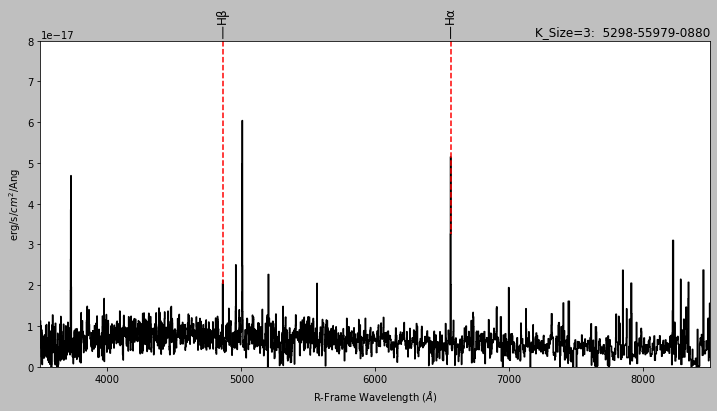

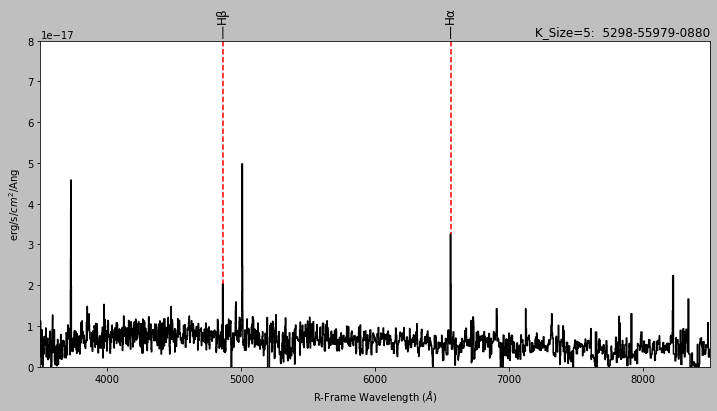

In [6]:
z = f1[2].data['z']
lamb = (10**f1[1].data['loglam']* u.AA)/(1+z)
flux = f1[1].data['flux']
err = np.sqrt(1/f1[1].data['ivar'])

plate = '5298-55979-0880'
ylim = (0, 8*10**-17)
xlim = (3500, 8500)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


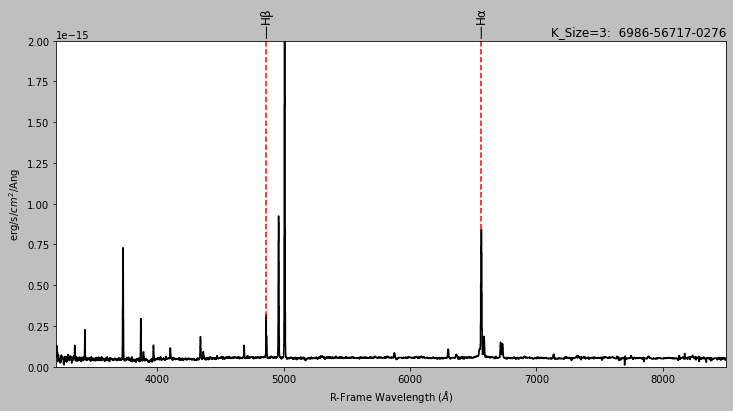

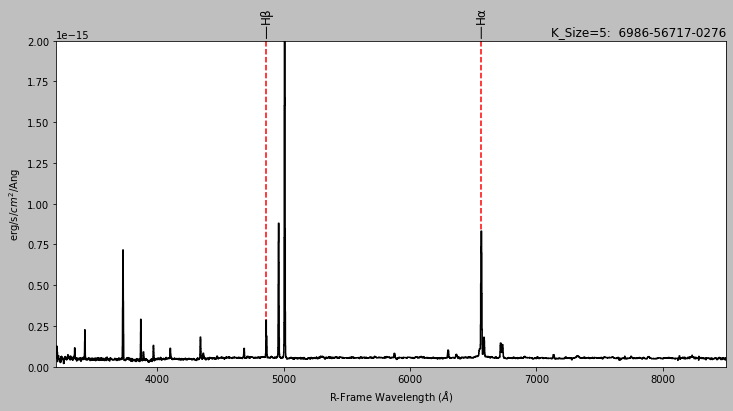

In [7]:
z = f2[2].data['z']
lamb = (10**f2[1].data['loglam']* u.AA)/(1+z)
flux = f2[1].data['flux']
err = np.sqrt(1/f2[1].data['ivar'])

plate = '6986-56717-0276'
xlim = (3200, 8500)
ylim = (0, 20*10**-16)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


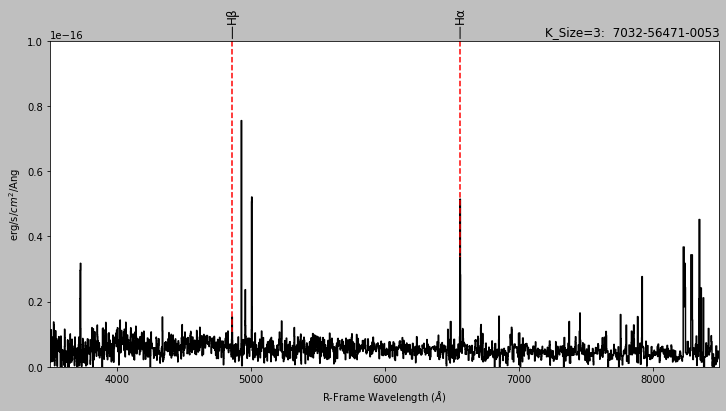

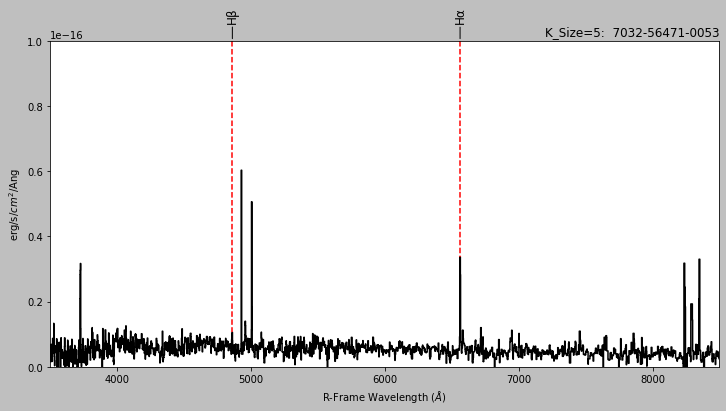

In [11]:
z = f3[2].data['z']
lamb = (10**f3[1].data['loglam']* u.AA)/(1+z)
flux = f3[1].data['flux']
err = np.sqrt(1/f3[1].data['ivar'])

plate = '7032-56471-0053'
xlim = (3500, 8500)
ylim = (0, 10*10**-17)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


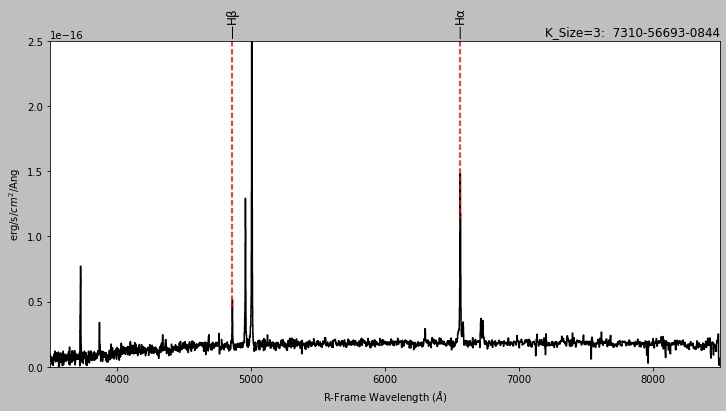

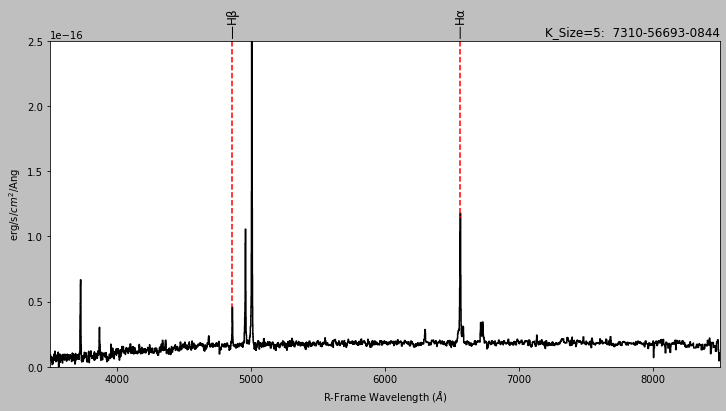

In [9]:
z = f4[2].data['z']
lamb = (10**f4[1].data['loglam']* u.AA)/(1+z)
flux = f4[1].data['flux']
err = np.sqrt(1/f4[1].data['ivar'])

plate = '7310-56693-0844'
xlim = (3500, 8500)
ylim = (0, 25*10**-17)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


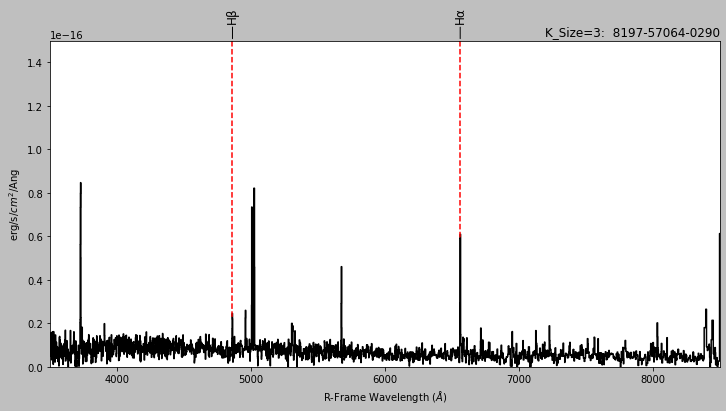

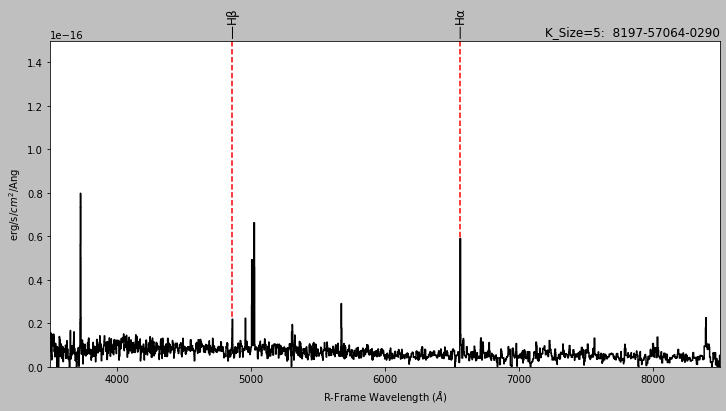

In [13]:
z = f5[2].data['z']
lamb = (10**f5[1].data['loglam']* u.AA)/(1+z)
flux = f5[1].data['flux']
err = np.sqrt(1/f5[1].data['ivar'])

plate = '8197-57064-0290'
xlim = (3500, 8500)
ylim =(0, 15*10**-17)

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux, kernel_size=5)
fluxhat1 = scipy.signal.medfilt(flux, kernel_size=3)

smooth_spec(lamb, flux, fluxhat)